In [1]:
import keras_ocr
import pytesseract
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

In [2]:
print(keras_ocr.__version__)
print(pytesseract.__version__)

0.8.8
0.3.8


In [3]:
file_dir = os.getenv("HOME")+ '/aiffel/ocr_python/image/test_img'
file_list = os.listdir(file_dir)

file_list = [os.path.join(file_dir,file_list[i]) for i in range(len(file_list))]
file_list.sort()
file_list

['/aiffel/aiffel/ocr_python/image/test_img/test1.jpg',
 '/aiffel/aiffel/ocr_python/image/test_img/test2.PNG',
 '/aiffel/aiffel/ocr_python/image/test_img/test3.PNG',
 '/aiffel/aiffel/ocr_python/image/test_img/test4.PNG',
 '/aiffel/aiffel/ocr_python/image/test_img/test5.PNG']

# keras-ocr

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [5]:
#이미지 입력단계
images = [ keras_ocr.tools.read(file) for file in file_list]
prediction_groups = [pipeline.recognize([file]) for file in file_list]

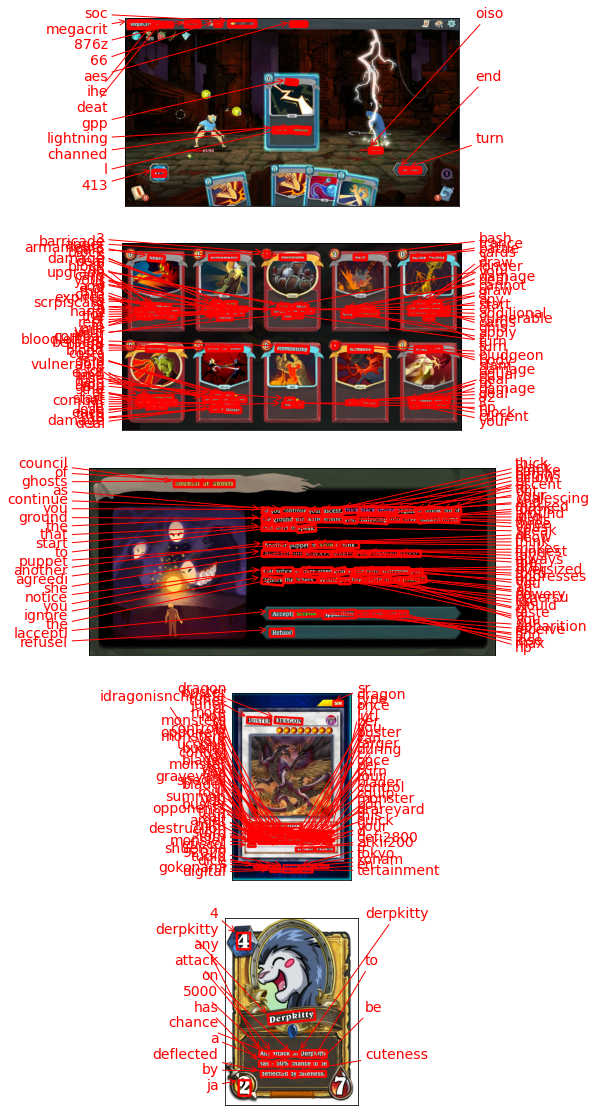

In [6]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# 테서랙트

In [7]:
def crop_word_regions(image_path, output_path):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [8]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image'
output_dir = work_dir + '/test5'
img_file_path = work_dir + '/test_img/test5.PNG'

cropped_image_path_list = crop_word_regions(img_file_path, output_dir)

/aiffel/aiffel/ocr_python/image/test5/0000.png
/aiffel/aiffel/ocr_python/image/test5/0001.png
/aiffel/aiffel/ocr_python/image/test5/0002.png
/aiffel/aiffel/ocr_python/image/test5/0003.png
/aiffel/aiffel/ocr_python/image/test5/0004.png
/aiffel/aiffel/ocr_python/image/test5/0005.png
/aiffel/aiffel/ocr_python/image/test5/0006.png
/aiffel/aiffel/ocr_python/image/test5/0007.png
/aiffel/aiffel/ocr_python/image/test5/0008.png
/aiffel/aiffel/ocr_python/image/test5/0009.png
/aiffel/aiffel/ocr_python/image/test5/0010.png
/aiffel/aiffel/ocr_python/image/test5/0011.png
/aiffel/aiffel/ocr_python/image/test5/0012.png
/aiffel/aiffel/ocr_python/image/test5/0013.png


In [9]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

Nod the

6.

Avi

Verpkitty

nas

eo

oleh,

cnance

ce

te

detiecteqd

Dy

®lisdilisoct


Done


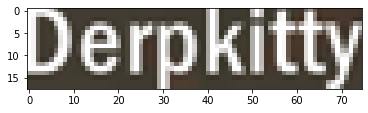

In [14]:
img_file_path = work_dir + '/test5/0003.png'   #테스트용 이미지 경로. 

image = Image.open(img_file_path)
plt.imshow(image)
plt.show()

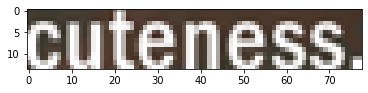

In [11]:
img_file_path = work_dir + '/test5/0012.png'   #테스트용 이미지 경로. 

image = Image.open(img_file_path)
plt.imshow(image)
plt.show()

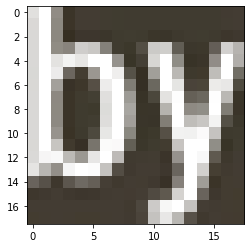

In [13]:
img_file_path = work_dir + '/test5/0011.png'   #테스트용 이미지 경로. 

image = Image.open(img_file_path)
plt.imshow(image)
plt.show()

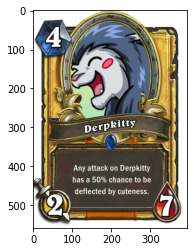

In [16]:
img_file_path = work_dir + '/test5/0013.png'   #테스트용 이미지 경로. 

image = Image.open(img_file_path)
plt.imshow(image)
plt.show()

# 회고

keras-ocr을 사용한 결과를 봤을 때 글자색이나 글자의 폰트에 영향을 많이 받는 것을 확인할 수 있었다. 게임에서 사용하는 카드에는 다양한 폰트가 사용되었는데 이를 제대로 인식하지 못했습니다. 그리고 글자 사이의 간격이 촘촘할수록 출력이 이상해지는 것도 확인할 수 있었습니다.
테서렉트를 사용했을 때 크롤링이 잘 된 것을 그림을 통해 확인했습니다. 하지만 pytesseract의 Output이 이미지를 텍스트로 변환하는데 있어서 많은 오류가 있었습니다. 제가 생각하기에는 크롤링 과정에서 이미지에 노이즈가 생겨서 이미지가 흐려져서 글씨를 인식하는데 어려움을 겪은 것 같습니다. 크롤링한 이미지를 OpenCV를 이용해서 필터링을 한 다음에 사용하면 좋은 결과를 얻을 수 있을 것 같습니다.

OCR 기술을 이용해서 요즘 유행하는 '유희왕 듀얼링크스' 나 'slayer spire', '하스 스톤' 같은 턴제 카드 게임에서 Player의 카드 패에 맞춰서 맞춤 전략을 짜는 AI를 만들어서 기존의 정해진 패턴으로 짜여진 플레이가 아닌 Player에 맞춰가는 유동적인 플레이를 할 수 있도록 만들 수 있을 것 같습니다. 이를 통해 유저는 좀 더 다양한 전략과 덱 빌딩을 하면서 좀 더 재밌게 게임을 즐길 수 있게 될 것 같습니다. 